In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. IMPORTING NECESSARY LIBRARIES & PACKAGES**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

**2. READING AND EXPLORING DATA**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/quikr_car - quikr_car.csv')
df.head() # Checking first 5 lines

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.tail() # Checking last 5 lines

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [5]:
df.info() # Checking Dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df.describe() # Checking statistical summary of the dataset / description of dataset

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [7]:
df.shape # Checking shape of the data

(892, 6)

In [8]:
df.columns # Checking column names

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

**3. DATA PREPROCESSING**

In [9]:
df.isnull().sum() # Checking Null values / Determining the dataset's percentage of missing values / Finding the percentage of Null values in the dataset

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [11]:
df.isnull().any()

name          False
company       False
year          False
Price         False
kms_driven     True
fuel_type      True
dtype: bool

In [10]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [12]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [13]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [14]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [15]:
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [17]:
#CLEANING
#1. year has many non-numeric values
df=df[df['year'].str.isnumeric()]
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [18]:
#2. year column is an object, Change it to integer
df['year']=df['year'].astype(int)

In [19]:
#3. price column as 'Ask for price' value in it
df=df[df['Price']!='Ask For Price']

In [20]:
#4. prices have commas in its rows (ie. prices) and is an object to be converted to integer type
df['Price']=df['Price'].str.replace(',','').astype(int)

In [21]:
#5. kms_driven is an object column with kms at last and commas in between
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [22]:
#6. kms_driven has nan values and has two petrol values in it
df=df[df['kms_driven'].str.isnumeric()]
df['kms_driven']=df['kms_driven'].astype(int)

In [23]:
#7. fuel_type has nan values.
df=df[~df['fuel_type'].isna()]

In [24]:
#8. Name and Company column had spammed data but with the previous cleaning, those rows got removed and Changing car names keeping only the first three words¶
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')
df['name'].head()

0       Hyundai Santro Xing
1       Mahindra Jeep CL550
3         Hyundai Grand i10
4    Ford EcoSport Titanium
6                 Ford Figo
Name: name, dtype: object

In [25]:
#9. Resetting the index of the final cleaned data
df=df.reset_index(drop=True)

In [26]:
#This is  the cleaned version ofthe data
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
5,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
6,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
7,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
8,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
9,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [28]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [29]:
df[df['Price']>6000000]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [32]:
df=df[df['Price']<6000000]
df.shape

(815, 6)

**4. EXPLORATORY DATA ANALYSIS**

In [44]:
#1. Checking relationship of Company with Price
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

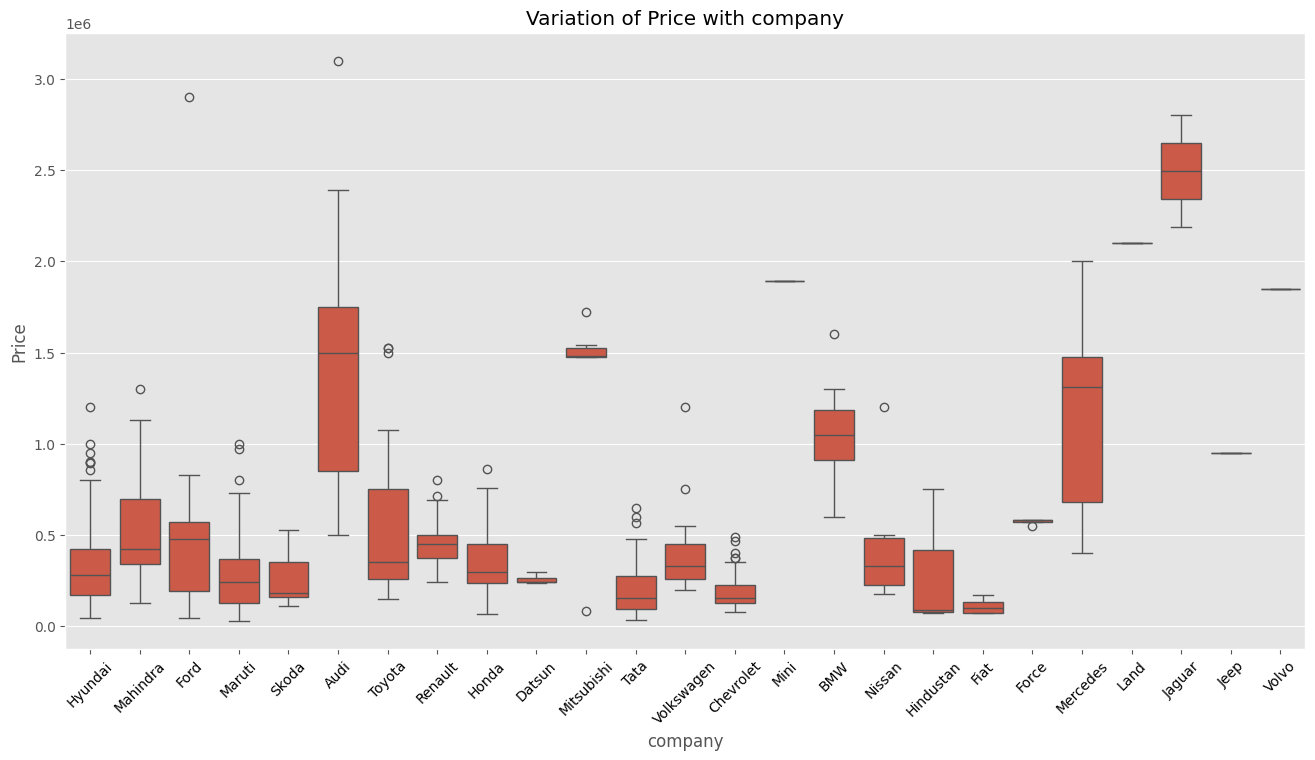

In [48]:
plt.figure(figsize=(16,8))
sns.boxplot(x='company',y='Price',data=df)
plt.xticks(rotation=45,color='black')
plt.title('Variation of Price with company')
plt.show()

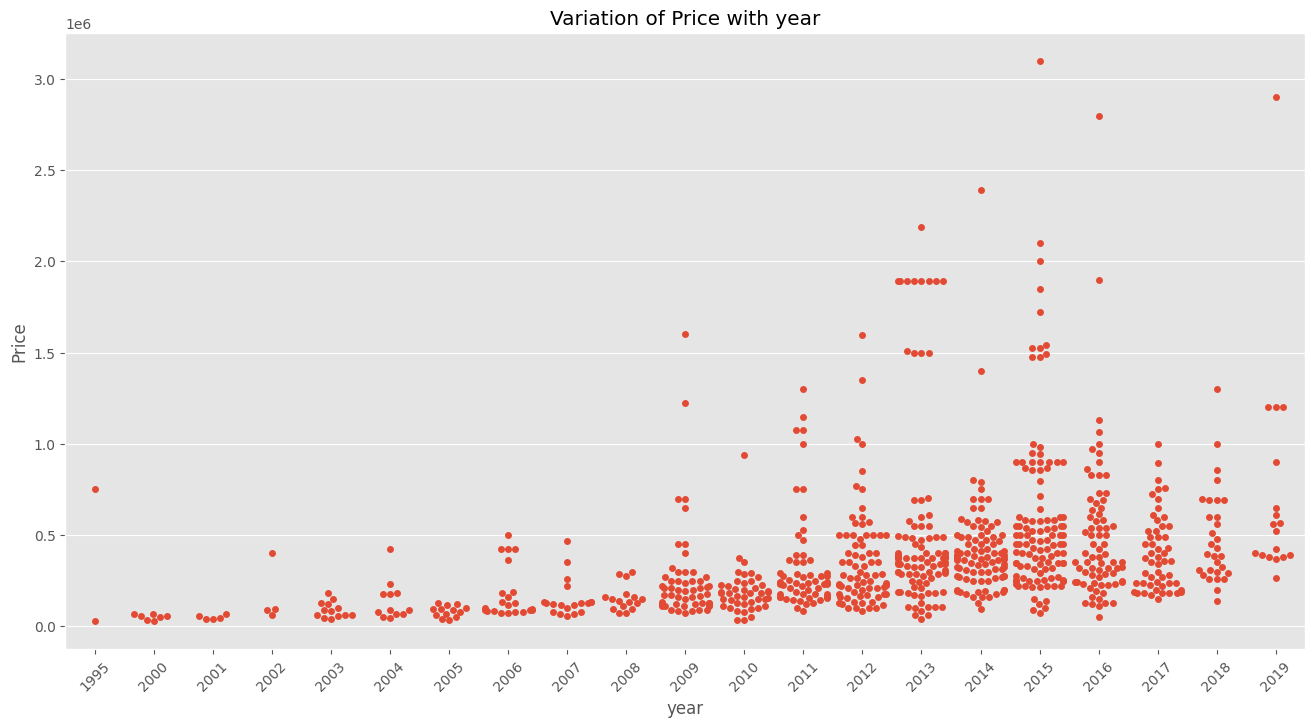

In [52]:
#2. Checking relationship of Year with Price
plt.figure(figsize=(16,8))
sns.swarmplot(x='year',y='Price',data=df)
plt.xticks(rotation=45)
plt.title('Variation of Price with year')
plt.show()

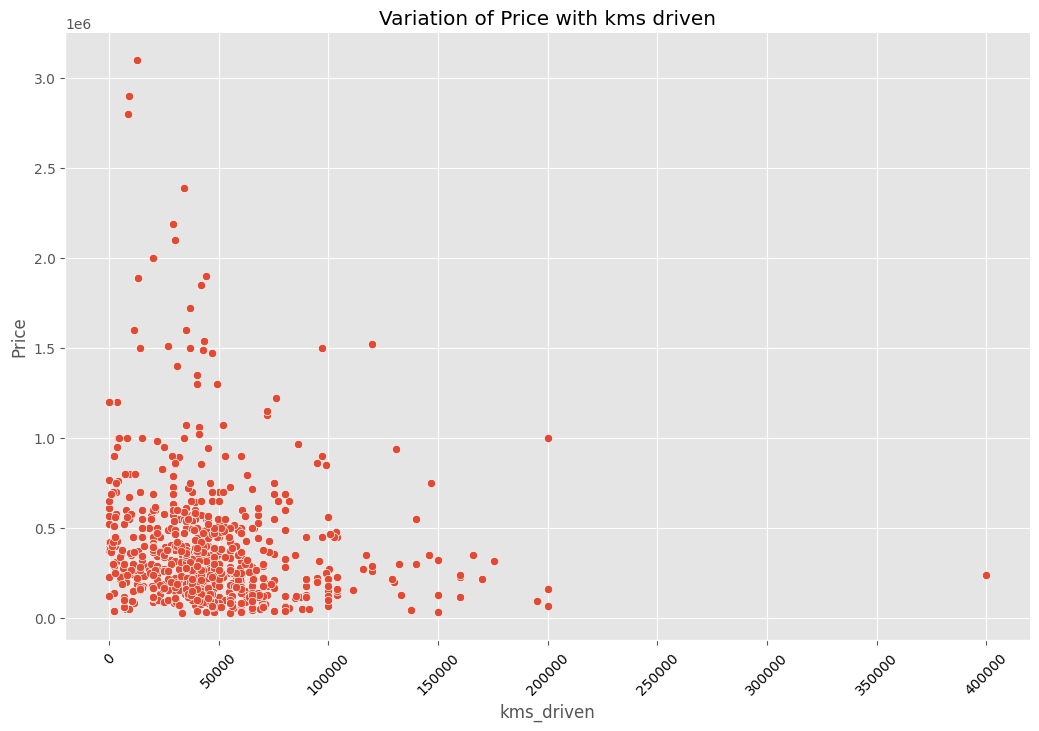

In [56]:
#3. Checking relationship of kms_driven with Price
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)
plt.xticks(rotation=45,color='black')
plt.title('Variation of Price with kms driven')
plt.show()

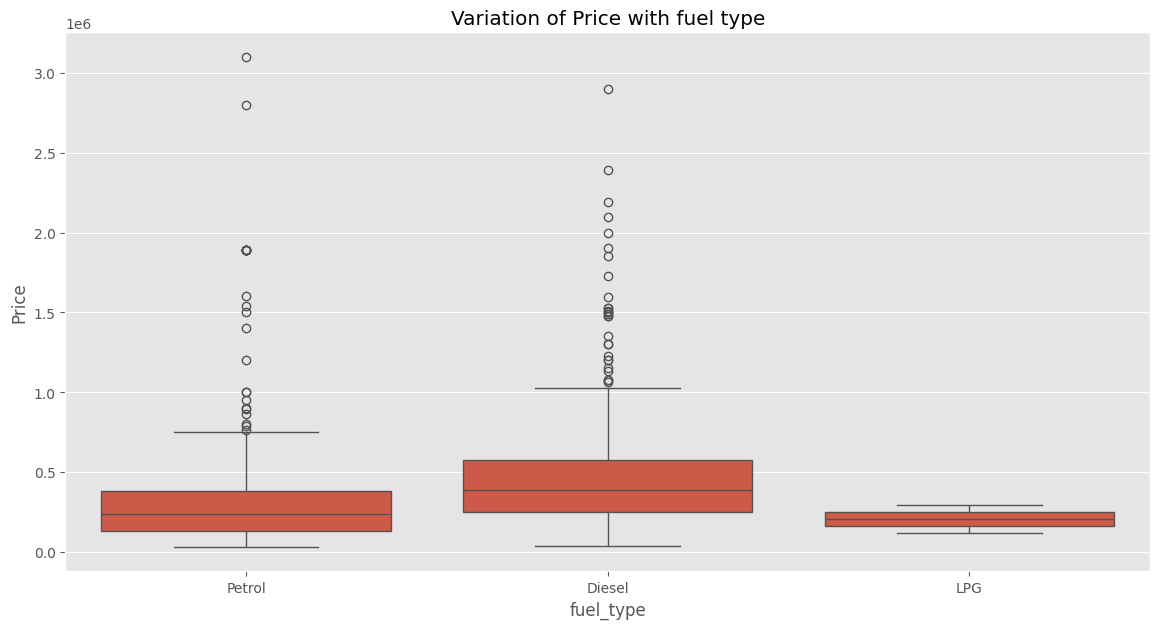

In [55]:
#4. Checking relationship of Fuel Type with Price
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=df)
plt.title('Variation of Price with fuel type')
plt.show()

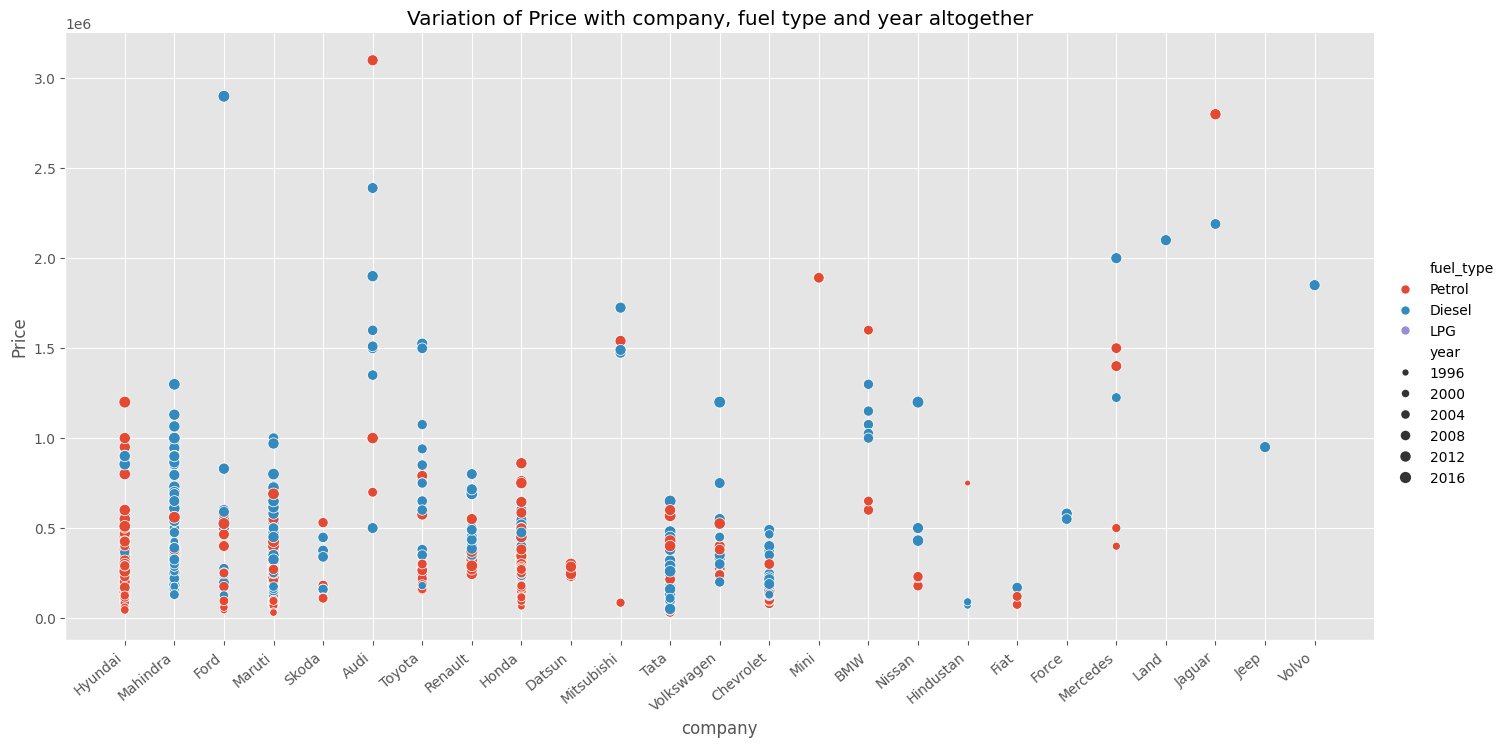

In [58]:
#5. Relationship of price with company, fuel_type and year altogether
ax=sns.relplot(x='company',y='Price',data=df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')
plt.title('Variation of Price with company, fuel type and year altogether')
plt.show()

**5. FEATURE ENGINEERING & MACHINE LEARNING MODEL SELECTION & MODEL TRAINING**

In [126]:
#1. Splitting the Dataset into X and Y
X = df.drop('Price', axis=1)
y = df['Price']

In [127]:
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [128]:
y.shape

(815,)

In [130]:
#2. Applying the Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)

In [133]:
#3. Creating a OneHotEncoder, pipeline and transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [134]:
on = OneHotEncoder()
on.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [136]:
#4. Creating a column transformer to transform categorical columns
column_trans = make_column_transformer((OneHotEncoder(categories=on.categories_), ['name', 'company', 'fuel_type']),
                                      remainder = 'passthrough')
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet B...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                           array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                 ['name', 'company', 'fuel_type'])])

In [140]:
#5. Applying ML MODELS
#A. LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#Making a pipeline
pipe = make_pipeline(column_trans, lr)

#Fitting the model
pipe.fit(X_train, y_train)

#Predicting the model
y_pred_lr = pipe.predict(X_test)

#Evaluating the model
r2_score(y_test, y_pred_lr)



0.8627124488093311

In [143]:
#B. RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

#Making a pipeline
pipe = make_pipeline(column_trans, rfr)

#Fitting the model
pipe.fit(X_train, y_train)

#Predicting the model
y_pred_rfr = pipe.predict(X_test)

#Evaluating the model
r2_score(y_test, y_pred_rfr)

0.8766783150811429

In [161]:
#C. DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

#Making a pipeline
pipe = make_pipeline(column_trans, dtr)

#Fitting the model
pipe.fit(X_train, y_train)

#Predicting the model
y_pred_dtr = pipe.predict(X_test)

#Evaluating the model
r2_score(y_test, y_pred_dtr)

0.6890034452284826

In [180]:
#D. KNEIGHBORS REGRESSOR
from sklearn.neighbors import KNeighborsRegressor
knr = DecisionTreeRegressor()

#Making a pipeline
pipe = make_pipeline(column_trans, knr)

#Fitting the model
pipe.fit(X_train, y_train)

#Predicting the model
y_pred_knr = pipe.predict(X_test)

#Evaluating the model
r2_score(y_test, y_pred_knr)

0.6342839165544801

In [181]:
#E. GRADIENT BOOSTING REGRESSOR
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#Making a pipeline
pipe = make_pipeline(column_trans, gbr)

#Fitting the model
pipe.fit(X_train, y_train)

#Predicting the model
y_pred_gbr = pipe.predict(X_test)

#Evaluating the model
r2_score(y_test, y_pred_gbr)

0.7145428737748896